In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

import warnings
#suppress warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

%pwd
%cd "/content/drive/MyDrive/Colab Notebooks/Taller 1"
%pwd

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Taller 1


'/content/drive/MyDrive/Colab Notebooks/Taller 1'

In [ ]:
data=np.loadtxt("datos2.txt",delimiter=',',skiprows=0,usecols=[0,1,2],dtype='float')
print(data[:,2])
dataSize = data.shape
print(dataSize[0])

[400900. 330900. 370000. 233000. 540900. 300900. 315900. 200000. 213000.
 243500. 241000. 348000. 331000. 700900. 260900. 450900. 300900. 200900.
 501000. 600000. 253900. 256000. 243900. 260900. 574900. 250900. 465500.
 470000. 476000. 300900. 350900. 170900. 315900. 580900. 286900. 250900.
 230900. 346000. 550000. 288000. 369500. 330900. 315000. 300000. 180900.
 300900. 240500.]
47


In [ ]:
#normalizar
promX = np.mean(data, 0)
print(promX)
dstdX = np.std(data, axis=0)
print(dstdX)
m = dataSize[0]
print(m)

[  3000.68085106   1003.17021277 341412.76595745]
[7.86202619e+02 7.52842809e-01 1.23702548e+05]
47


In [ ]:
def normalizando(data,promX,dstdX,m):
  Xn = np.zeros((m,3))

  for i in range(m):
    for j in range(3):
        Xn[i,j] = (data[i,j]-promX[j])/dstdX[j]

  print(Xn)
  return(Xn)

In [ ]:
Xn = np.zeros((m,3))
Xn = normalizando(data,promX,dstdX,m)

[[ 1.31415422e-01 -2.26093368e-01  4.80889321e-01]
 [-5.09640698e-01 -2.26093368e-01 -8.49842317e-02]
 [ 5.07908699e-01 -2.26093368e-01  2.31096567e-01]
 [-7.43677059e-01 -1.55439190e+00 -8.76398814e-01]
 [ 1.27107075e+00  1.10220517e+00  1.61263643e+00]
 [-1.99450507e-02  1.10220517e+00 -3.27501468e-01]
 [-5.93588523e-01 -2.26093368e-01 -2.06242850e-01]
 [-7.29685755e-01 -2.26093368e-01 -1.14316777e+00]
 [-7.89466782e-01 -2.26093368e-01 -1.03807697e+00]
 [-6.44465993e-01 -2.26093368e-01 -7.91517781e-01]
 [-7.71822042e-02  1.10220517e+00 -8.11727551e-01]
 [-8.65999486e-04 -2.26093368e-01  5.32505933e-02]
 [-1.40779041e-01 -2.26093368e-01 -8.41758409e-02]
 [ 3.15099326e+00  2.43050370e+00  2.90606169e+00]
 [-9.31923697e-01 -2.26093368e-01 -6.50857784e-01]
 [ 3.80715024e-01  1.10220517e+00  8.85084715e-01]
 [-8.65782986e-01 -1.55439190e+00 -3.27501468e-01]
 [-9.72625673e-01 -2.26093368e-01 -1.13589226e+00]
 [ 7.73743478e-01  1.10220517e+00  1.29008850e+00]
 [ 1.31050078e+00  1.10220517e+

**PLOT DATA**

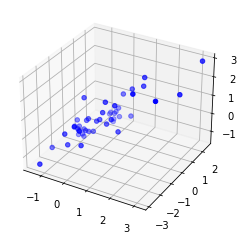

In [ ]:
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

# Definimos los datos de prueba
x = Xn[:,0]
y = Xn[:,1]
z = Xn[:,2]

# Agregamos los puntos en el plano 3D
ax1.scatter(x, y, z, c='b', marker='o')

# Mostramos el gráfico
plt.show()

In [ ]:
Beta = np.zeros((3,1))
onesVector = np.ones((dataSize[0],))

X = np.column_stack((onesVector,Xn[:,0],Xn[:,1]))
y=np.zeros((dataSize[0],1))
y[:,0] = Xn[:,2]

alpha = 0.01
numIter = 500

In [ ]:
temp1 = (np.reshape(X[:,0],(m,1)))
h_beta = np.dot(X,Beta)
temp3 = np. multiply(temp1,(np.subtract(h_beta,y)))
temp2 = np.sum(temp3)
temp4=temp2*(alpha/m)

In [ ]:
def Gradiente(Beta,alpha,m,X,y,numIter,J):
  betaTemp = np.zeros((3,1))
  h_beta = np.zeros((m,1))
  Z = np.zeros((m,1))
  

  for i in range(numIter):
    for j in range(3):
      h_beta = np.dot(X,Beta)
      temp1 = (np.reshape(X[:,j],(m,1)))
      temp2 = np.sum(np. multiply(temp1,(np.subtract(h_beta,y))))
      betaTemp[j,0] = Beta[j,0] - (temp2*(alpha/m))
  
    Beta = betaTemp
    h_beta = np.dot(X,Beta)
    J[i]  = (1/(2*m))*(np.sum((np.subtract(h_beta,y)**2))) #Implementar la función cost


  return (Beta, J)


[[ 4.01983411e-17]
 [ 8.84765655e-01]
 [-5.31781836e-02]]


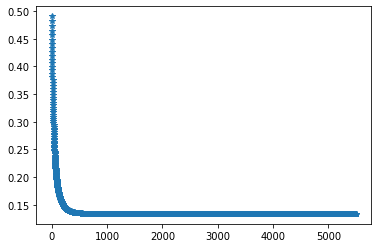

In [ ]:
alpha = 0.01
numIter = 5500
J = np.zeros(numIter,)
Beta = np.zeros((3,1))

Beta, J = Gradiente(Beta,alpha,m,X,y,numIter,J)

plt.plot(J,'*')
print(Beta)

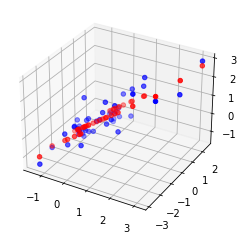

In [ ]:
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

h_beta = np.dot(X,Beta)
ax1.scatter(x, y, z, c='b', marker='o')
ax1.scatter(x, y, h_beta, c='r', marker='o')
plt.show()